In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/karan/Music/air_quality_prediction-linear-regression--master/Train.csv")

In [3]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
data = df.values

In [5]:
data.shape

(1600, 6)

In [6]:
X = data[:,:4]
y = data[:,5]
print(X.shape,y.shape)

(1600, 4) (1600,)


In [7]:
# Normalise this dataset
# Each feature must have 0 mean, unit variance
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [8]:
# Normalise the Data
X = (X-u)/std

In [9]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3
0,0.290165,-0.898712,-0.372381,0.441771
1,-0.842705,-0.158229,-0.723656,-0.994642
2,0.233004,0.157070,-0.102094,0.729947
3,0.171708,0.167210,-0.530576,-0.078377
4,-1.702188,0.558336,-2.723087,-0.633625


In [10]:
X.shape, y.shape

((1600, 4), (1600,))

In [11]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(1600, 5)


In [12]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta) 
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
     
    return theta,error_list

In [13]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  8.123055696487427


In [14]:
print(theta)

[ 0.31883538 29.58183206 94.64476427  8.2099499  45.50787888]


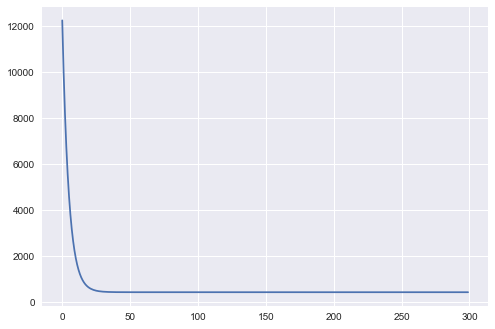

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [16]:
y_ = []

for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [17]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [18]:
# SCORE
r2_score(y,y_)

96.56006008885362

In [19]:
#Optimized
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [20]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.01093435287475586


In [21]:
y_ = hypothesis(X,theta)
r2_score(y,y_)

96.56006008885362

### Using Sk-Learn

In [23]:
pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\karan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X,y)

LinearRegression()

In [27]:
model.coef_

array([ 0.        , 29.58183206, 94.64476427,  8.2099499 , 45.50787888])

In [28]:
model.intercept_

0.318835384415816

In [29]:
model.predict([X[0],X[1]])

array([-59.10911394, -90.79071926])

In [30]:
y[0], y[1] 

(-82.1546665555647, -48.89796018174452)

In [31]:
model.score(X,y)

0.9656006008885362

In [32]:
import pickle

In [33]:
filename='model/Regressor_model.sav'

In [35]:
pickle.dump(model, open(filename, 'wb'))